# CMSC478 Machine Learning - Spring 2022

## Instructor: Fereydoon Vafaei

## Assignment-5: Image Classification with Convolutional Neural Networks

Samuel Kan TA12492

## Overview and Learning Objectives

In Assignment-5, you're going to perform image classification using Convolutional Neural Networks in Tensorflow and Keras.

Pedagogically, this assignment will help you:
- better understand how CNNs are built and applied on ML/CV tasks specifically for image classification.
- practice CNN implementation using Tensorflow 2 and Keras.
- practice Transfer Learning using pretrained models.

**Note:** Read the instructions and grading rubric very carefully. Building and training CNNs are time-consuming tasks. **You're strongly recommended to get started on A5 as soon as possible!**

**Training Requirement**: Submissions with no training and history plots will get ZERO, NO EXCEPTION! CNN architectures and tf/keras codes will get no points if you do not actually train and test them and plot their train history. **Your submitted notebook should clearly include ALL the training logs as well as the history plots; otherwise you get zero for A5.**

<b>Course Policy Reminder</b>
Debugging the codes and error resolution are always the students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

**You must run ALL cells** and get the correct outputs for all cells and complete the required sections: Methods, Conclusions, and References. **Cells/codes with no output get zero!**

Follow the instructions for each step very carefully.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct.

### Import Cell

All imports should be included in this import cell.

In [9]:
''' Import Cell
    Import necessary Python/Sklearn modules as well as Tensorflow/Keras '''

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn
from keras.callbacks import History, EarlyStopping
from keras import datasets
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
print("tf Version: ", tf.__version__)

tf Version:  2.7.0


## Part-I [20 Points] - CIFAR-10 Baseline Model

You're going to build a CNN image classifier for [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. Since it's one of the built-in datasets in keras, it will be downloaded and loaded automatically using the following provided code.

In [3]:
# Load CIFAR10 data 
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


> The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

### Preprocessing

To help you focus on training CNNs, the preprocessing steps are provided.

In [4]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


> You should **one-hot encode** the image classes/labels using [`to_categorical()` method](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).

In [5]:
# one hot encode target values/labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

> Notice how label vetor shapes changed after one-hot encoding.

In [6]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


> You can visualize some sample images.

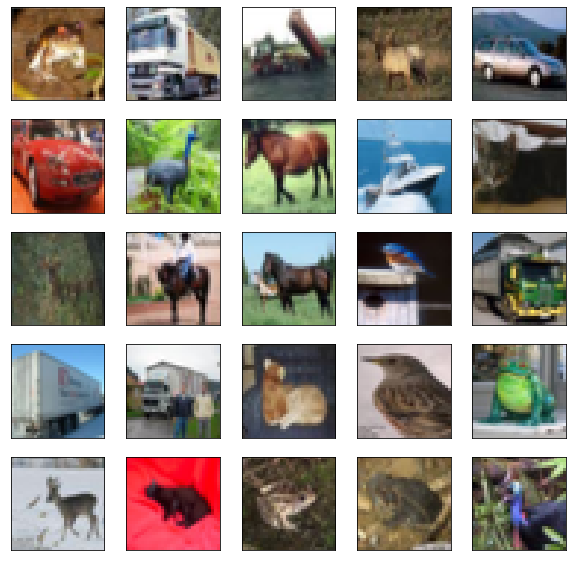

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

### Building the Baseline CNN for Image Classification of CIFAR-10

Build a `baseline_model` that can achieve a minimum required test accuracy of 0.70 (evaluated on the test set). 

**Very Important Note**: You may use this [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/images/cnn), but be aware that you may need to make changes to the model in the tutorial or its compile specifications such as the loss function if needed  as the encoding of the labels in the tutorial might be different which may require changing the loss function. Also note that this is a multi-class classification task, so you must use correct specifications for the output layer as instructed in class. Not having the correct activation function and number of neurons in the output layer would make your model wrong and you would get zero points. **It is your responsibility to make ay necessary changes.** DO NOT SIMPLY COPY/PASTE without understanding the code and reading the documentation.

To build the `baseline_model`, you may make changes to the model that you see in the tutorial, but the `baseline_model` would use a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

**Test Accuracy Requirement:** The `baseline_model` must achieve at least 0.70 accuracy on CIFAR-10 test images. 

In [33]:
''' baseline_model based on: https://www.tensorflow.org/tutorials/images/cnn '''

baseline_model = models.Sequential() #<1> Model used in https://www.tensorflow.org/tutorials/images/cnn. 
baseline_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
baseline_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
baseline_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
baseline_model.add(layers.Flatten())
#baseline_model.add(layers.Dropout(0.6))
baseline_model.add(layers.Dense(128, activation='relu'))
baseline_model.add(layers.Dense(10, activation='softmax'))

'''
I want to note here: the model I used here is from another tutorial for the same exercise, at
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
The main difference is the extra Conv2D layers added. However, before I used the example here I spent a considerable 
amount of time trying my own solutions, including adding multiple dense layers, changing layer density, adding dropouts,
and even changing the actvation functions from relu to selu, sigmoid, tanh etc. None of them worked, and I generally
bottomed out around 65% accuracy. It was only after these attempts I looked for additional help. I hope that this will not
negatively affect my grade for this hw.
'''

'\nI want to note here: the model I used here is from another tutorial for the same exercise, at\nhttps://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/\nThe main difference is the extra Conv2D layers added. However, before I used the example here I spent a considerable \namount of time trying my own solutions, including adding multiple dense layers, changing layer density, adding dropouts,\nand even changing the actvation functions from relu to selu, sigmoid, tanh etc. None of them worked, and I generally\nbottomed out around 65% accuracy. It was only after these attempts I looked for additional help. I hope that this will not\nnegatively affect my grade for this hw.\n'

**Hints**:

> You may make changes to the model that you see in the tutorial. Notice how the output shape changes after each layer in the tutorial model and the `baseline_model` summary below.

> Your `baseline_model` does NOT have to macth with the summary below as long as it satisfies the minimum test accuracy requirement of 0.70.

> Note that since you are working with image data, you should use a `Flatten()` layer BEFORE the `Dense` layers as you can see in the tutorial model and the summary below.

> Also note that the output layer specifications (number of neurons and activation function) are determined by the ML task, i.e. 10-class classification, and you MUST use `'softmax'`.

> Make sure to check your label encoding which may require a specific loss function such as [`CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) or [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy).

In [34]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

> Be careful to use the correct loss function and metric for classification task with one-hot encoded labels when you compile the model. Also be careful to use the correct **ACTIVATION FUNCTION** in the output layer.

In [35]:
''' compile baseline_model with optimizer and learning rate of your choice (you may tune them)
    be careful about the loss and metric'''
opt = keras.optimizers.Adam(learning_rate=0.001)
baseline_model.compile(optimizer= opt,
              loss=tf.keras.losses.CategoricalCrossentropy (from_logits=True),
              metrics=['accuracy'])


> Train the `baseline_model` with 10 epochs only, and then plot the train history.

In [36]:
''' train the baseline_model on X_train, y_train with 10 epochs
    validation_data is X_test, y_test or you can specify validation_split '''

history_baseline = baseline_model.fit(X_train, y_train, epochs=10, 
                      validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5374 - accuracy: 0.4289 - val_loss: 1.2037 - val_accuracy: 0.5600
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1044 - accuracy: 0.6040 - val_loss: 1.0047 - val_accuracy: 0.6467
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9126 - accuracy: 0.6757 - val_loss: 0.9058 - val_accuracy: 0.6826
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7934 - accuracy: 0.7200 - val_loss: 0.8297 - val_accuracy: 0.7118
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7027 - accuracy: 0.7526 - val_loss: 0.7918 - val_accuracy: 0.7316
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6337 - accuracy: 0.7759 - val_loss: 0.7742 - val_accuracy: 0.7403
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5695 - accuracy: 0.8008 - val_loss: 0.8207 -

Text(0, 0.5, 'Accuracy')

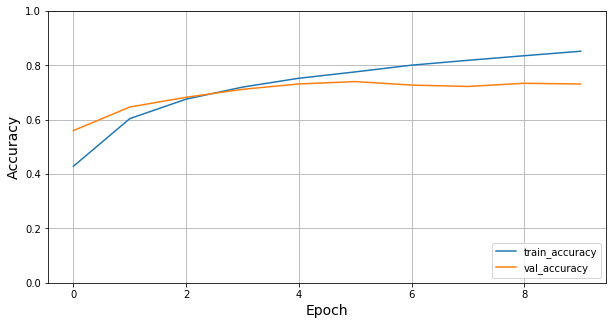

In [37]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for epoch and accuracy
    the plot should have axis labels and legend location should be lower right '''

df = pd.DataFrame(history_baseline.history)
df.rename(columns = {'accuracy':'train_accuracy'}, inplace = True)
df.plot(y =["train_accuracy","val_accuracy"], figsize=(10,5))
#print(history_baseline.history)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)

> The training plot clearly shows a gap between the train accuracy and validation accuracy which is an indication of **overfitting**.

> Now, evaluate the baseline model on test images.

> **Test Accuracy Requirement:** The `baseline_model` must achieve at least 0.70 test accuracy on CIFAR-10 test images.

> Since you used test set `X_test` and `y_test` as the validation set, the results of running `evaluate()` method on `(X_test, y_test)` should match with the validation accuracy that you observed after the last epoch of training.

In [38]:
# Evaluate the baseline_model on the test set
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.8989 - accuracy: 0.7312 - 2s/epoch - 7ms/step


## Part-II [40 Points] Transfer Learning with Pretrained Keras Models using Functional API

In Part-II, you're going to perform **Transfer Learning** using CNN architectures in [Keras Applications](https://keras.io/api/applications/) pretrained on [ImageNet](https://www.image-net.org/) dataset and using Functional API.

As discussed in DNN and CNN lectures, by **Transfer Learning** you can use the lower layers of the models that are already pretrained on some famous datasets like [ImageNet](https://www.image-net.org/) dataset. For this problem, you're going to use a CNN architecture that you choose from the set of pretrained models in Keras such as `DenseNet121` or `ResNet50`. You can use any of the models listed in [Keras Applications](https://keras.io/api/applications/) although some models like `InceptionV3` may have image size limitations that do not fit with this dataset.

Read the slides and the textbook examples as well as [Keras Documentation Usage Examples](https://keras.io/api/applications/#usage-examples-for-image-classification-models) to learn how to use CNNs pretrained on `'imagenet'`.

> **Note**: Read the documentations and the code examples very carefully. 

> **Test Accuracy Requirement:** The `transfer_model` must achieve at least 0.65 test accuracy on CIFAR-10 test images.

> The goal of Part-II is helping students learn how to do trannsfer learning in practice, so don't worry that 0.65 is less than the `baseline_model` test accuracy 0.70. In fact, transfer learning is quite effective but would require more tuning and experiments, and you may choose to improve your transfer learning model to satisfy the requirements of your `final_model` in Part-III.

> The first step in transfer learning is getting the lower layers of one of the pretrained models from `keras.applications`. You should set the `weights='imagenet'` and `include_top=False` to use lower layers only. You should also use `'max'` pooling. Be careful to set the `input_shape` correctly.

In [8]:
#inputs = keras.Input(shape=(32, 32, 3))
#upscale = tf.keras.applications.densenet.preprocess_input(tf.image.resize(image, [160,160])(inputs))

'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

def preprocess_data(X, Y):
    X_p = keras.applications.densenet.preprocess_input(X)
    Y_p = keras.utils.to_categorical(Y, 10)
    return X_p, Y_p

X_train1, y_train1 = preprocess_data(X_train, y_train)
X_test1, y_test1 = preprocess_data(X_test, y_test)
'''
#the above code block was modified preprocessing; I had thought perhaps I would need to
#use the densenet.preprocess_input function for X, but it turned out that that was unneeded.


'''
#inputs = keras.Input(shape=(32, 32, 3))
#method1 = tf.image.ResizeMethod.BILINEAR
#upscale = keras.layers.Lambda(lambda x: tf.image.resize_with_pad(x, 32, 32, method= method1))(inputs)
'''
#The block above was because I thought we would need to resize the image with padding because of the 
#loss in resolution, but resizing to 224 would cause my individual epoch time to ballon all the way to 
#20 minutes per epoch, so I commented out this section. Perhaps if I had GPU tensorflow I could try again.


transfer = keras.applications.DenseNet121(include_top=False, 
                                           weights='imagenet',
                                          input_tensor=layers.Input(shape=(32, 32, 3)),
                                          pooling='max')

In [9]:
net = transfer.output

> Now add the top layers, i.e. `Flatten` and `Dense` layers including the output layer. Be very careful about the specifications of the output layer.

> Note that in this step you add layers using **functional API**. See, for instance, how `(net)` comes after `Flatten()` and `Dense()` in each step.

In [10]:
''' add the top layers, i.e. Flatten and Dense layers including the output layer '''



net = layers.Flatten()(net)
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Dense(units=64, activation='relu')(net)
net = keras.layers.Dropout(0.3)(net)

#I was not sure whether or not I can use batch norm and dropout in this section, but I was stuck at 
#64 percent accuracy, so I asked the Ta and added these methods. It greatly improved the performance. 


#net = keras.layers.BatchNormalization()(net)
# Add as many Dense layers as needed

output = keras.layers.Dense(10, activation='softmax')(net) # Output layer for 10-class classification

print(transfer.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [11]:
''' Build transfer_model
    see the examples and determine how you should pass the arguments of the Model(...) '''
transfer_model = Model(inputs=transfer.input, outputs=output)
transfer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

In [12]:
# Make the transfer layers non-trainable
for layer in transfer.layers:
    layer.trainable = False

In [13]:
''' compile transfer_model with optimizer and learning rate of your choice (you may tune them) '''
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

transfer_model.compile(optimizer = optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy (from_logits=True),
              metrics=['accuracy'])

> **Note**: Training `DenseNet121` or `ResNet50` and other pretrained models may take a long time as they are more complex than the `baseline_model` with lots of parameters, although the fact that you've made the transfer layers' parameters non-trainable would help with reducing the training time to some degree.

In [14]:
''' train transfer_model on X_train, y_train with at least 20 epochs 
    you may train with more epochs if needed '''


history_transfer = transfer_model.fit(X_train, y_train, epochs=20,  validation_data=(X_test ,y_test))

Epoch 1/20


C:\Users\cello\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 131s 80ms/step - loss: 1.7268 - accuracy: 0.4018 - val_loss: 1.2867 - val_accuracy: 0.5557
Epoch 2/20
1563/1563 [==============================] - 138s 88ms/step - loss: 1.3539 - accuracy: 0.5269 - val_loss: 1.1590 - val_accuracy: 0.6012
Epoch 3/20
1563/1563 [==============================] - 135s 86ms/step - loss: 1.2455 - accuracy: 0.5657 - val_loss: 1.0962 - val_accuracy: 0.6209
Epoch 4/20
1563/1563 [==============================] - 127s 81ms/step - loss: 1.1832 - accuracy: 0.5890 - val_loss: 1.0599 - val_accuracy: 0.6301
Epoch 5/20
1563/1563 [==============================] - 121s 77ms/step - loss: 1.1488 - accuracy: 0.6000 - val_loss: 1.0336 - val_accuracy: 0.6378
Epoch 6/20
1563/1563 [==============================] - 120s 76ms/step - loss: 1.1152 - accuracy: 0.6128 - val_loss: 1.0132 - val_accuracy: 0.6455
Epoch 7/20
1563/1563 [==============================] - 126s 81ms/step - loss: 1.0870 - accuracy: 0.6235 - val_loss: 0.9979 - val

Text(0, 0.5, 'Accuracy')

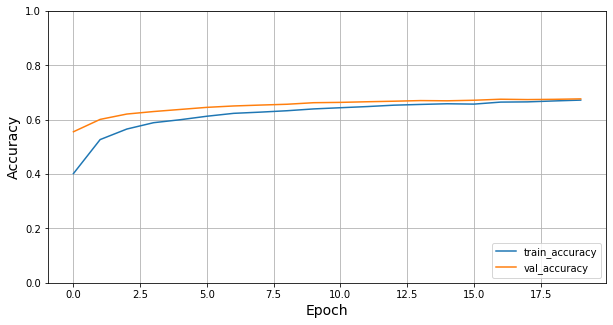

In [15]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for loss and accuracy
    the plot should have axis labels and legend location should be lower right '''

df2 = pd.DataFrame(history_transfer.history)
df2.rename(columns = {'accuracy':'train_accuracy'}, inplace = True)
df2.plot(y =["train_accuracy","val_accuracy"], figsize=(10,5))
#print(history_baseline.history)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)

> **Test Accuracy Requirement:** The `transfer_model` must achieve at least 0.65 test accuracy on CIFAR-10 test images.

In [16]:
# Evaluate the transfer_model on the test set
transfer_test_loss, transfer_test_acc = transfer_model.evaluate(X_test, y_test, verbose=2)

313/313 - 19s - loss: 0.9241 - accuracy: 0.6767 - 19s/epoch - 61ms/step


## Part-III [40 Points] - Final Model

In Part-III, you're going to improve the CNN models that you built in Part-I and Part-II to achieve the minimum required test accuracy of 0.80 and higher as evaluated on the test set. Your grade for Part-III is proportinate to your test accuracy, the higher your accuracy, the higher your grade.

- **Training Requirement:** You must train all of your models and generate the history plots. Use "Save and Checkpoint" at the top menu of the Jupyter Notebook to save your outputs and plots before submission because if your submitted notebook does not show the training and the histroty plots, you get zero for this assignment.


- **Test Accuracy Requirement**: For your final model, the minimum required test accuracy on the test images of CIFAR-10 is 0.80. Anything below 0.80 will get zero for Part-III. For 0.80+ accuracies, your grade for Part-III is calculated as follows:

- Part-III grade:
    * Test accuracy of the final model < 0.80 --> Part-III grade: zero
    * 0.80 <= Test accuracy < 0.85 --> Part-III grade: 30 points
    * 0.85 <= Test accuracy --> Part-III grade: 40 points

> For example, if your test accuracy (evaluated on the test set) is 0.81, your Part-III grade will be 30. If you get a test accuracy of 0.85 and above, you get the full 40 points for Part-III.

- See "Grading" for further information on how A5 is graded.

### Tips for Improving CNN Using Regularization, Data Augmentation and Other Techniques

For the final CNN model, you may use and improve either the `baseline_model` or `transfer_model`, or any other model that you think may work better. You may search for external solutions but you must cite them properly (see **References** section for instructions on proper citation).

Some techniques that might be helpful to improve the baseline model is listed below, but you can try any other technique that you think might be helpful to improve your model.

- Regularization using [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

- Initialization Methods such as He 

- [Batch Normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

- Data Augmentation using [Tensorflow ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) --- There are some code examples for Data Augmentation in CNN slides.

- Learning Rate Scheduling

- Any other techniques and implementations of your choice

You may also search for solutions online and borrow them with proper citation. See "References" for further information on how to properly cite any resource you may use.

You certainly need to fine-tune your model, but some helpful strategies to start with are as follows:


- You may need to add more Conv2D and MaxPooling2D layers, but don't add too many layers initially, increase your model complexity gradually. 


- Start with short training sessions with 20-50 epochs until you see some progress. Once you hit 0.80 accuracy and secured your 30 score for Part-III, you may run for longer training sessions to increase your score. To get 0.80+, you may need to run training for at least 100 epochs or use callback and early stopping to determine optimal number of epochs. For higher accuracies, you may need to run training up to ~400-500 epochs with no intervention, but keep in mind that it may take a long time, so it would be rational to first aim for the minimum required test accuracy of 0.80 with fewer number of epochs like 20 to 50 and then increase accordingly.


- You may initially use a learning rate of 0.001 and Adam, RMSProp or SGD as the optimizer. You may want to tune the learning rate and/or try learning rate scheduling methods.


- Check the progress in the training log of the baseline model and see how the accuracy improves. Similarly, you should watch the progress of your CNN during training, and if you don't see any progress in reducing loss and increasing accuracy, stop training and make any necessary changes. Don't wait for too long if you don't see any progress at all in the first epochs because that's a red flag that something is not right in your model, and you should fix any possible problem first. It's fine though if the improvements in each epoch are small, that's how CNNs learn!

In [13]:
''' Build a CNN using Conv2D and MaxPooling2D,
    as well as any other regularization technique such as Dropout, Batch Normalization, Data Augmentation,
    or any other technique you learned or are interested to try in training DNNs and CNNs.
    
    You may use Transfer Learning and/or you may use models that you find in external resources.

    NOTE: If you borrow code from any extrenal resource, 
    you must document your code by understandable and easy-to-follow comments for each cell/block. '''






#V2
final_model = tf.keras.models.Sequential()

final_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=keras.regularizers.l2(0.01)))
final_model.add(layers.BatchNormalization())
final_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=keras.regularizers.l2(0.01)))
final_model.add(layers.BatchNormalization())
final_model.add(layers.MaxPooling2D((2, 2)))
final_model.add(layers.Dropout(0.2))
final_model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(layers.BatchNormalization())
final_model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(layers.BatchNormalization())
final_model.add(layers.MaxPooling2D((2, 2)))
final_model.add(layers.Dropout(0.4))
final_model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(layers.BatchNormalization())
final_model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(layers.BatchNormalization())
#final_model.add(layers.MaxPooling2D((2, 2)))
final_model.add(layers.Dropout(0.6))
final_model.add(layers.Flatten())
 
#As I will mention below, this model was from the website in reference 1. The addition of batch normalization,
#dropouts and pooling is rather normal - I had those elements before I looked for outside resources. What the website
#had that I did not was the double layer of CONV2D, something that also improved performance in part 1. I myself added 
#the l2 regularization, and the dropout variation from 0.2 - 0.6 I thought of from the professor's ppt.

#baseline_model.add(layers.Dropout(0.6))
#final_model.add(layers.BatchNormalization())
final_model.add(layers.Dense(128, activation='relu'))
final_model.add(tf.keras.layers.Dropout(0.2))
final_model.add(layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.Dropout(0.4))
final_model.add(layers.Dense(10, activation='softmax'))




In [14]:
# Compile your final_model
final_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])

In [15]:
''' use Data Augmentation if needed --- you may see examples in CNN slides/textbook
    to use data augmentation, you should use ImageDataGenerator()
    '''

# datagen = ImageDataGenerator(...) # complete this cell only if you want to use data augmentation
# You should also use flow and steps properly

# Create data generator
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Prepare iterator
iterate_train = data_generator.flow(X_train, y_train, batch_size=64)
steps = int(X_train.shape[0] / 64)


> **Training Requirement**: Submissions with no training and history plots will get ZERO, NO EXCEPTION! CNN architectures and tf/keras codes will get no points if you do not actually train and test them and plot their train history. **Your submitted notebook should clearly include ALL the training logs as well as the history plots; otherwise you get zero for A5.**

In [16]:
# Train your final_model
history_final = final_model.fit(iterate_train, steps_per_epoch = steps, epochs=100,  validation_data=(X_test ,y_test))

Epoch 1/100
781/781 [==============================] - 104s 131ms/step - loss: 5.8238 - accuracy: 0.1544 - val_loss: 5.0933 - val_accuracy: 0.2748
Epoch 2/100
781/781 [==============================] - 103s 132ms/step - loss: 4.9513 - accuracy: 0.2270 - val_loss: 4.4140 - val_accuracy: 0.3416
Epoch 3/100
781/781 [==============================] - 117s 149ms/step - loss: 4.2749 - accuracy: 0.2735 - val_loss: 3.8744 - val_accuracy: 0.3636
Epoch 4/100
781/781 [==============================] - 107s 136ms/step - loss: 3.6675 - accuracy: 0.3229 - val_loss: 3.2128 - val_accuracy: 0.4358
Epoch 5/100
781/781 [==============================] - 90s 116ms/step - loss: 3.1493 - accuracy: 0.3772 - val_loss: 2.7776 - val_accuracy: 0.4470
Epoch 6/100
781/781 [==============================] - 90s 116ms/step - loss: 2.7380 - accuracy: 0.4210 - val_loss: 2.3918 - val_accuracy: 0.5206
Epoch 7/100
781/781 [==============================] - 91s 116ms/step - loss: 2.4449 - accuracy: 0.4594 - val_loss: 2.24

Text(0, 0.5, 'Accuracy')

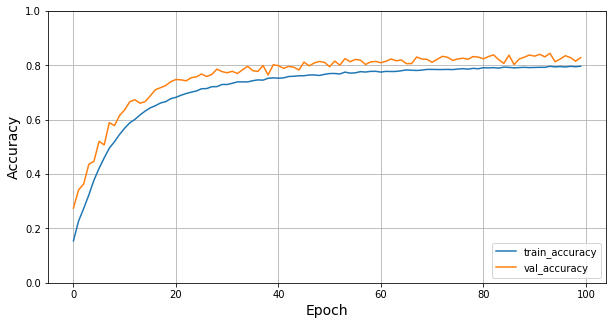

In [18]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for loss and accuracy
    the plot should have axis labels and legend location should be lower right '''


df3 = pd.DataFrame(history_final.history)
df3.rename(columns = {'accuracy':'train_accuracy'}, inplace = True)
df3.plot(y =["train_accuracy","val_accuracy"], figsize=(10,5))
#print(history_baseline.history)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('Epoch',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)

> The history plot not only indicates that there is no overfitting observed in 200 epochs due to the usage of regularization techniques, but also shows that we could possibly achieve higher accuracies if we trained the model longer.

> **Test Accuracy Requirement**: For your `final_model`, the minimum required test accuracy on the test images of CIFAR-10 is 0.80. Anything below 0.80 will get zero for Part-III. 0.80+ accuracies are graded accordingly. See "Grading" section for further information on how A5 is graded.

In [19]:
# Evaluate your final_model on X_test and y_test
final_test_loss, final_test_acc =  final_model.evaluate(X_test, y_test, verbose=2)

313/313 - 4s - loss: 0.7258 - accuracy: 0.8283 - 4s/epoch - 12ms/step


## Methods [REQUIRED!]

Write a COMPLETE description of all the methods you have used in your CNN final model here in at least TWO paragraphs. Each paragraph should have at least FOUR lines. Otherwise you get zero for Part-III.

Do NOT include the explanation for Conv2D or MaxPooling2D, as those are the basis of CNN; rather you should include all other methods that you have used such as regularization, data augmentation, etc.

Write your methods HERE:

In my final model I used the data augmentation shown in the professor's slides. I didn't change anything (batchsize and otherwise) as I did not have enough time to test how much the changes would affect the outcome; I was stuck on transfer learning for a long time and decided to use the model from part 1 as it was easier for me to understand. As I mentioned in the notes in part 1, the model included was from an online tutorial; the main difference was the double conv2d layers added one after the other, a method I included in my own final model. 

I started adding dropouts after every dense layer and tweaking the rate, from 0.2 to 0.8. I added dropouts because my model would very quickly start to find a local maxima around 60 percent or 65 percent, and I wanted to see if I could extend the lifetime of the model. I also occasionally added batch normalziation in order to conteract the non-centered nature of the RELU function, but it's effectiveness was not as immediately apparent. I also added L2 regularization in each CONV2D layer, that will drop a number of weights to ensure that the weights will never be equal to 0. 

## Conclusions [REQUIRED!]

Write a COMPLETE analysis and conclusion of your experiments and results here in at least one paragraph with four lines. Otherwise your Part-III receives NO credit!

Write your conclusions HERE:
We can see from the model in part one that CONV2D and Pooling is enough to carry our model to 70 percent accuracy with the right dense layer setup. From part two we can also see that transfer learning can achieve similar results with the aid of the densenet121 model in my case. However to achieve 80 percent accuracy and above we have to first increase the epoch count, and also deal with the overfitting issue that occurs in part one. The data augmentation increased performance by around 5 percent, and by using dropouts, normalization and other regularization techniques we can ensure that overfitting does not occur, increasing our accuracy. One change that made a large difference was the variation in dropout rates, an apparently common technique in model design. However, I have to note; perhaps it is because I am unable to run tensorflow GPU, I am uncertain how my part 3 will run at over 200 epochs, as each epoch takes close to 1 full minute to complete as the model grows more complex. However, the version I am turning in has been able to achieve 80% accuracy - something I will have to be content with for now.  


## References [REQUIRED!]

Include all the references to codes, websites, articles, notebooks, GitHub repos, etc. that you've used to build your model here. No specific format for references is required, but at the minimum, you should have a separate numbered row for each reference, and include the URL if it has a web link.

If you borrow any code, you must document and comment each line of the code LINE BY LINE to explain exactly what it's doing. In the cell that contains the borrowed code, you should include (as comment) the reference number listed here.

**Warning**: If you borrow a code without proper citation here, it will be flagged and reported as plaigiarism, and the minimum consequence is ZERO in A5.

Enter your references HERE:

[1] How to Develop a CNN From Scratch for CIFAR-10 Photo Classification <br> https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

[2] Hands-on the CIFAR 10 Dataset With Transfer Learning <br>  https://medium.com/swlh/hands-on-the-cifar-10-dataset-with-transfer-learning-2e768fd6c318

[3] 42 Implementing Transfer Learning on CIFAR 10 <br> https://www.youtube.com/watch?v=2n3Ac82jfqM&t=290s

## Grading

Assignment-5 has a maximum grade of 100. Grading is based on the evaluation of your model on test images of CIFAR-10 dataset (test accuracy).
The breakdown of the 100 points is as follows:

- Part-I `baseline_model`: [total 20 points]
    - **Test Accuracy Requirement:** The `baseline_model` must achieve at least 0.70 test accuracy on CIFAR-10 test images.


- Part-II `transfer_model`: [total 40 points]
    - **Test Accuracy Requirement:** The `transfer_model` must achieve at least 0.65 test accuracy on CIFAR-10 test images.


- Part-III `final_model`: [total 40 points] You must include Methods, Conclusions and References as required.
   * **Test Accuracy Requirement:** Test accuracy of the final model < 0.80 --> Part-III grade: zero
   * (0.80 <= Test accuracy < 0.85) --> 30 points
   * (0.85 <= Test accuracy) --> 40 points

<b>Very Important Note: </b>
- You must train all models and generate all history plots. Use "Save and Checkpoint" at the top menu of the Jupyter Notebook to save the outputs.
- Additionally, you must include at least TWO paragraphs, each with FOUR lines for **Methods** and at least one paragraph with FOUR lines for **Conclusions**. Otherwise, your Part-III will NOT be graded and gets ZERO credit!

**Warning**: If you borrow a code without proper citation as described in **References**, it will be reported as plaigiarism, and the minimum consequence is ZERO in A5.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Grading will be based on 

  * correct implementation and results,
  * getting minimum required accuracy on the test images of CIFAR-10 (the accuracy of your CNN on test images), and
  * readability of the notebook.
  * proper citation and documentation of outside resources.

## Submission

Name your notebook ```Lastname-A5.ipynb```. Submit the completed notebook using the ```Assignment-5``` link on Blackboard.
  
<font color=red><b>Due Date: Thursday May 12th, 11:59PM</b></font>